In [1]:
#Data Loading
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# loading the crimes data
data = pd.read_csv("Crimes_-_2001_to_present.csv")
# columns in the dataset
print(data.columns)
data.head()

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4930918,HM544061,08/16/2006 03:55:00 PM,006XX W SHERIDAN RD,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,True,False,...,46.0,6.0,05,1171089.0,1926189.0,2006,02/28/2018 03:56:25 PM,41.952937,-87.646460,"(41.952937476, -87.646459694)"
1,4930924,HM545898,08/17/2006 12:00:00 AM,053XX N CUMBERLAND AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,...,41.0,76.0,26,1119313.0,1934228.0,2006,02/28/2018 03:56:25 PM,41.975978,-87.836624,"(41.975978414, -87.83662354)"
2,4930927,HM545908,08/17/2006 03:00:00 PM,021XX N CANNON DR,0810,THEFT,OVER $500,OTHER,False,False,...,43.0,7.0,06,1175179.0,1914632.0,2006,02/28/2018 03:56:25 PM,41.921134,-87.631772,"(41.92113376, -87.631772431)"
3,4930930,HM545922,08/15/2006 04:00:00 PM,042XX W ROSCOE ST,0820,THEFT,$500 AND UNDER,VEHICLE NON-COMMERCIAL,False,False,...,30.0,16.0,06,1147358.0,1922261.0,2006,02/28/2018 03:56:25 PM,41.942647,-87.733798,"(41.942647489, -87.733797696)"
4,4930933,HM543384,08/16/2006 10:40:00 AM,069XX S PERRY AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE PORCH/HALLWAY,False,False,...,6.0,69.0,05,1176595.0,1859006.0,2006,02/28/2018 03:56:25 PM,41.768460,-87.628248,"(41.768459991, -87.628247735)"


In [2]:
#Filtering years from 2007 to 2019
years = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
crimes = data[data.Year.isin(years)]

In [3]:
#Data cleaning
crimes = crimes.dropna()

In [4]:
#Date column
crimes['Date'] = pd.to_datetime(crimes['Date'], format = '%m/%d/%Y %I:%M:%S %p')

In [5]:
#Rerteiving Month from Date column
import calendar
crimes['Month'] = (crimes['Date'].dt.month).apply(lambda x:calendar.month_abbr[x])
crimes.head(3)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month
789585,6844652,HR251351,2009-04-04 11:50:00,063XX S BISHOP ST,0810,THEFT,OVER $500,STREET,False,False,...,67.0,06,1167751.0,1862782.0,2009,02/28/2018 03:56:25 PM,41.779016,-87.660557,"(41.779016193, -87.660557005)",Apr
790845,6844653,HR251408,2009-04-03 23:00:00,020XX W HOOD AVE,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,2.0,06,1161444.0,1940736.0,2009,02/28/2018 03:56:25 PM,41.993062,-87.681508,"(41.993061721, -87.681508318)",Apr
795175,6844654,HR250489,2009-04-03 10:00:00,087XX S RACINE AVE,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,False,False,...,71.0,26,1169851.0,1846838.0,2009,02/28/2018 03:56:25 PM,41.735218,-87.653320,"(41.735218425, -87.653320252)",Apr


In [6]:
crimes['Date_only'] = crimes['Date'].dt.date


In [7]:
crimes.head(3)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Date_only
789585,6844652,HR251351,2009-04-04 11:50:00,063XX S BISHOP ST,0810,THEFT,OVER $500,STREET,False,False,...,06,1167751.0,1862782.0,2009,02/28/2018 03:56:25 PM,41.779016,-87.660557,"(41.779016193, -87.660557005)",Apr,2009-04-04
790845,6844653,HR251408,2009-04-03 23:00:00,020XX W HOOD AVE,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,06,1161444.0,1940736.0,2009,02/28/2018 03:56:25 PM,41.993062,-87.681508,"(41.993061721, -87.681508318)",Apr,2009-04-03
795175,6844654,HR250489,2009-04-03 10:00:00,087XX S RACINE AVE,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,False,False,...,26,1169851.0,1846838.0,2009,02/28/2018 03:56:25 PM,41.735218,-87.653320,"(41.735218425, -87.653320252)",Apr,2009-04-03


In [8]:
df = pd.DataFrame()
df['count'] = crimes.groupby('Date_only')['ID'].count()
df

,count
Date_only,
2009-01-01,1524
2009-01-02,1027
2009-01-03,1096
2009-01-04,989
2009-01-05,995
2009-01-06,966
2009-01-07,969
2009-01-08,946
2009-01-09,1041


Text(0,0.5,'count')

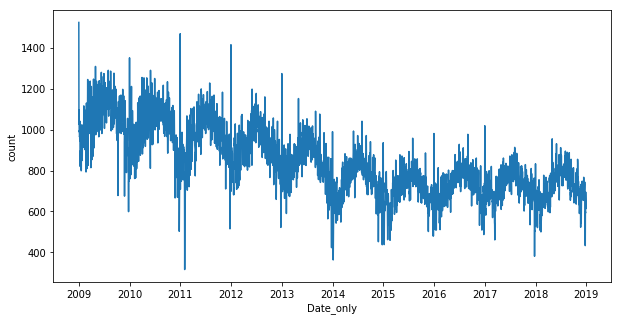

In [31]:
#plotting data
import matplotlib.pyplot as plt
df['count'].plot(figsize=(10, 5))
#plt.figure(figsize=(20,5))
x= [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
#plt.xticks(np.arange(min(x), max(x)+1, 1.0)
plt.ylabel('count')

#plt.show()

# Data stationarity check

Text(0.5,1,'AutoCorrelation Plot(Q)')

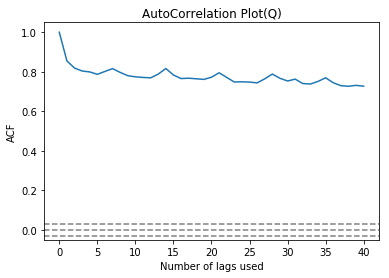

In [10]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf=acf(df['count'],nlags=40)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df['count'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df['count'])),linestyle='--',color='gray')
plt.xlabel('Number of lags used')
plt.ylabel('ACF')
plt.title('AutoCorrelation Plot(Q)')

In [11]:
#Differencing
df_diff = df.diff(periods = 1)

df_diff=df_diff[1:]

Text(0.5,1,'AutoCorrelation Plot(Q)')

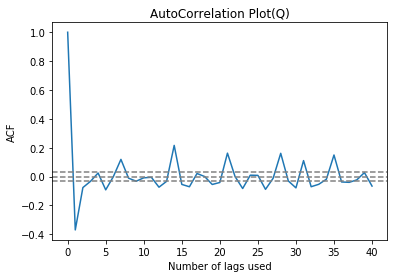

In [12]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf,pacf

lag_acf=acf(df_diff['count'],nlags=40)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df['count'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df['count'])),linestyle='--',color='gray')
plt.xlabel('Number of lags used')
plt.ylabel('ACF')
plt.title('AutoCorrelation Plot(Q)')

In [13]:
X= df.values

In [14]:
X.size

3652

In [15]:
#train and test data
train = X[0:2556]
test = X[2555:]

In [16]:
test.size

1097

In [17]:
predictions = []

In [18]:
#AR model
from statsmodels.tsa.ar_model import AR
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [19]:
#predictions of AR model
predict = model_ar_fit.predict(start = 2556, end = 3652)

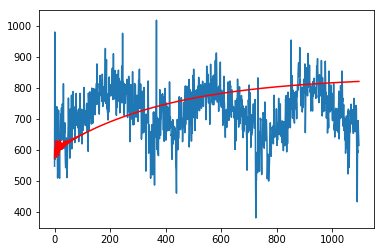

In [20]:
#plotting AR and its predictions
plt.plot(test)
plt.plot(predict,color='red')

# ARIMA

In [21]:
from statsmodels.tsa.stattools import acf, pacf

In [22]:
lag_acf = acf(df_diff, nlags=20)
lag_pacf = pacf(df_diff, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

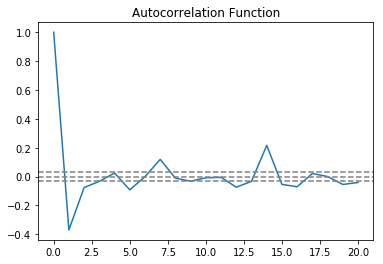

In [23]:
#Plot ACF: 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

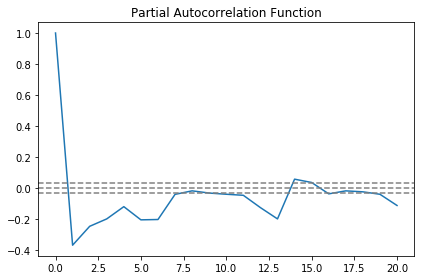

In [24]:
#Plot PACF:
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [25]:
from statsmodels.tsa.arima_model import ARIMA

In [26]:
#ARIMA
def ARIMA(Actual, P, D, Q):
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    #print(model_fit.aic)
    return prediction

Actual = [x for x in train]
Predictions = list()

for i in range(len(test)):
    ActualValue =  test[i]
    #forcast value
    Prediction = ARIMA(Actual, 1,1,1)    
    print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)

Actual=548.000000, Predicted=589.400327
Actual=981.000000, Predicted=585.175174
Actual=570.000000, Predicted=734.575546
Actual=616.000000, Predicted=613.570165
Actual=622.000000, Predicted=625.246134
Actual=620.000000, Predicted=626.318598
Actual=623.000000, Predicted=625.081598
Actual=703.000000, Predicted=625.513325
Actual=740.000000, Predicted=653.040694
Actual=647.000000, Predicted=670.727631
Actual=591.000000, Predicted=644.889144
Actual=510.000000, Predicted=625.439080
Actual=544.000000, Predicted=593.662242
Actual=647.000000, Predicted=597.271343
Actual=729.000000, Predicted=627.997237
Actual=725.000000, Predicted=658.409812
Actual=642.000000, Predicted=663.767638
Actual=533.000000, Predicted=640.513379
Actual=509.000000, Predicted=602.388426
Actual=604.000000, Predicted=587.096719
Actual=616.000000, Predicted=612.753335
Actual=627.000000, Predicted=615.994265
Actual=694.000000, Predicted=619.730568
Actual=716.000000, Predicted=643.806669
Actual=667.000000, Predicted=656.269658


Actual=805.000000, Predicted=780.774503
Actual=785.000000, Predicted=789.117393
Actual=818.000000, Predicted=783.604253
Actual=864.000000, Predicted=795.207811
Actual=785.000000, Predicted=813.450836
Actual=763.000000, Predicted=790.681758
Actual=789.000000, Predicted=782.369642
Actual=911.000000, Predicted=789.508165
Actual=806.000000, Predicted=832.041709
Actual=829.000000, Predicted=802.964827
Actual=778.000000, Predicted=811.237737
Actual=765.000000, Predicted=795.084114
Actual=782.000000, Predicted=788.809455
Actual=857.000000, Predicted=792.366812
Actual=822.000000, Predicted=817.496431
Actual=831.000000, Predicted=809.054730
Actual=790.000000, Predicted=813.399731
Actual=715.000000, Predicted=800.727039
Actual=712.000000, Predicted=773.402592
Actual=844.000000, Predicted=766.580371
Actual=738.000000, Predicted=807.358583
Actual=821.000000, Predicted=773.831722
Actual=836.000000, Predicted=799.254855
Actual=832.000000, Predicted=806.543918
Actual=810.000000, Predicted=807.950294


Actual=714.000000, Predicted=690.096712
Actual=706.000000, Predicted=702.644029
Actual=663.000000, Predicted=700.872272
Actual=667.000000, Predicted=686.298861
Actual=820.000000, Predicted=685.347084
Actual=742.000000, Predicted=736.784508
Actual=671.000000, Predicted=717.598665
Actual=707.000000, Predicted=695.148292
Actual=672.000000, Predicted=705.264016
Actual=693.000000, Predicted=693.159608
Actual=647.000000, Predicted=698.338927
Actual=651.000000, Predicted=681.716216
Actual=588.000000, Predicted=679.656574
Actual=570.000000, Predicted=654.821373
Actual=628.000000, Predicted=641.923413
Actual=619.000000, Predicted=655.097899
Actual=698.000000, Predicted=649.214766
Actual=620.000000, Predicted=673.799453
Actual=670.000000, Predicted=648.801041
Actual=632.000000, Predicted=663.367158
Actual=651.000000, Predicted=650.646586
Actual=676.000000, Predicted=655.370116
Actual=676.000000, Predicted=663.580336
Actual=661.000000, Predicted=664.695542
Actual=671.000000, Predicted=660.464717


Actual=641.000000, Predicted=735.849045
Actual=721.000000, Predicted=713.989861
Actual=694.000000, Predicted=734.514769
Actual=722.000000, Predicted=723.723237
Actual=731.000000, Predicted=730.443770
Actual=673.000000, Predicted=732.665326
Actual=717.000000, Predicted=712.273813
Actual=695.000000, Predicted=723.600919
Actual=720.000000, Predicted=715.228364
Actual=793.000000, Predicted=721.836492
Actual=820.000000, Predicted=746.945901
Actual=805.000000, Predicted=760.824630
Actual=763.000000, Predicted=761.374120
Actual=696.000000, Predicted=750.988913
Actual=815.000000, Predicted=728.817159
Actual=793.000000, Predicted=766.860394
Actual=792.000000, Predicted=763.881358
Actual=823.000000, Predicted=766.327354
Actual=800.000000, Predicted=779.560516
Actual=808.000000, Predicted=775.771908
Actual=741.000000, Predicted=780.876201
Actual=710.000000, Predicted=760.178914
Actual=706.000000, Predicted=747.442012
Actual=795.000000, Predicted=742.303910
Actual=731.000000, Predicted=769.631046


Actual=694.000000, Predicted=657.436899
Actual=688.000000, Predicted=678.930758
Actual=685.000000, Predicted=678.192006
Actual=668.000000, Predicted=678.004706
Actual=598.000000, Predicted=672.577953
Actual=692.000000, Predicted=647.221941
Actual=666.000000, Predicted=675.682639
Actual=688.000000, Predicted=667.974966
Actual=633.000000, Predicted=675.500643
Actual=614.000000, Predicted=657.143573
Actual=652.000000, Predicted=647.971537
Actual=707.000000, Predicted=658.052180
Actual=765.000000, Predicted=676.879223
Actual=741.000000, Predicted=700.315583
Actual=776.000000, Predicted=698.031330
Actual=677.000000, Predicted=714.585702
Actual=594.000000, Predicted=685.320777
Actual=724.000000, Predicted=654.936271
Actual=692.000000, Predicted=695.096636
Actual=621.000000, Predicted=686.478284
Actual=716.000000, Predicted=661.748005
Actual=787.000000, Predicted=691.403565
Actual=672.000000, Predicted=718.910615
Actual=690.000000, Predicted=684.668764
Actual=709.000000, Predicted=689.742399


C:\Users\renug\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=710.000000, Predicted=771.076495
Actual=665.000000, Predicted=738.218899
Actual=684.000000, Predicted=719.363852
Actual=642.000000, Predicted=720.713096
Actual=723.000000, Predicted=702.056750
Actual=708.000000, Predicted=724.947907
Actual=732.000000, Predicted=719.342807
Actual=735.000000, Predicted=726.714197
Actual=703.000000, Predicted=728.240346
Actual=663.000000, Predicted=717.437997
Actual=685.000000, Predicted=701.694030
Actual=733.000000, Predicted=705.648900
Actual=695.000000, Predicted=720.655155
Actual=689.000000, Predicted=708.261713
Actual=658.000000, Predicted=704.747143
Actual=674.000000, Predicted=692.074002
Actual=709.000000, Predicted=694.339286
Actual=743.000000, Predicted=704.737697
Actual=790.000000, Predicted=717.214160
Actual=636.000000, Predicted=736.460672
Actual=691.000000, Predicted=686.796874
Actual=716.000000, Predicted=701.303899
Actual=780.000000, Predicted=709.120936
Actual=702.000000, Predicted=732.522874
Actual=808.000000, Predicted=709.359553


C:\Users\renug\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=772.000000, Predicted=746.289308
Actual=705.000000, Predicted=739.494263
Actual=705.000000, Predicted=718.779718
Actual=742.000000, Predicted=717.358041
Actual=855.000000, Predicted=729.245961
Actual=836.000000, Predicted=770.668532
Actual=757.000000, Predicted=772.189902
Actual=767.000000, Predicted=750.251802
Actual=677.000000, Predicted=754.426692
Actual=687.000000, Predicted=723.509510
Actual=747.000000, Predicted=722.422118
Actual=673.000000, Predicted=740.269960
Actual=663.000000, Predicted=714.495975
Actual=703.000000, Predicted=706.781059
Actual=633.000000, Predicted=716.680161
Actual=641.000000, Predicted=690.303970
Actual=665.000000, Predicted=687.444607
Actual=590.000000, Predicted=691.371717
Actual=615.000000, Predicted=661.894102
Actual=662.000000, Predicted=663.636109
Actual=710.000000, Predicted=675.565535
Actual=651.000000, Predicted=691.334396
Actual=607.000000, Predicted=671.993749
Actual=625.000000, Predicted=654.095235
Actual=669.000000, Predicted=655.782886


Test Mean Squared Error (smaller the better fit): 3238.116


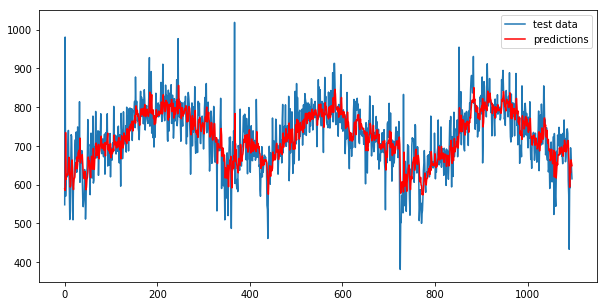

In [34]:
#metrics and prediction plot
from sklearn.metrics import mean_squared_error
Error = mean_squared_error(test, Predictions)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)
# plot test data and predictions
plt.figure(figsize=(10,5))
plt.plot(test,label='test data')
plt.plot(Predictions, color='red',label='predictions')
plt.legend(loc='upper right')

plt.show()


In [28]:
#grid search for arima order
import itertools
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [29]:
#printing order and its AIC 
import warnings
from statsmodels.tsa.arima_model import ARIMA
warnings.filterwarnings('ignore')
for param in pdq:
    model = ARIMA(Actual, order =param)
    fit = model.fit(disp=0)
    print(param,fit.aic)
   

(0, 0, 0) 47553.50437957378
(0, 0, 1) 45295.82504501846
(0, 1, 0) 42948.85793826459
(0, 1, 1) 41799.448105505944
(1, 0, 0) 42702.61849140497
(1, 0, 1) 41806.35783507122
(1, 1, 0) 42410.1228175361
(1, 1, 1) 41635.9015919989


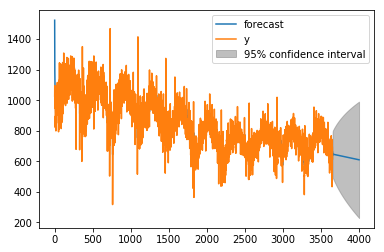

<Figure size 720x720 with 0 Axes>

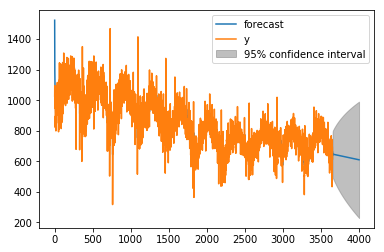

In [37]:
#plotting ARIMA forecast basing on best oreder with lowest AIC score
plt.figure(figsize=(10,10))
model = ARIMA(Actual, order=(1, 1, 1))
model_fit = model.fit(disp=0)
forecast,std,conf=model_fit.forecast(50)
model_fit.plot_predict(1,4000)
